In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>환경에 따른 주택 가격 예측하기</h1>

- 보스턴 주택 가격 데이터: 사이킷런 내장 데이터셋
- 사이킷런의 선형 회귀 모델 구축
- 데이터가 주택 가격에 미치는 영향을 산점도와 선형 회귀 그래프로 시각화

In [4]:
!pip install scikit-learn

In [8]:
import numpy as np
import pandas as pd
boston_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/PredictHousePrice/Boston_house.csv')
boston_df #데이터 확인
boston_df.info() #데이터 컬럼 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Y = boston_df['Target']
X = boston_df.drop(['Target'], axis = 1, inplace = False)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 156)

In [10]:
lr = LinearRegression() #선형 회귀 분석 모델 객체 lr 생성
lr.fit(X_train, Y_train) #training 데이터로 학습 수행
Y_predict = lr.predict(X_test) #생성한 선형 회귀 분석 모델을 통해 예측 수행

In [11]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


In [12]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

Y 절편 값:  40.99559517216473
회귀 계수 값:  [  0.    0.    3.4  -0.1  -1.7   0.   -0.6 -19.8  -0.9   0.4   0.1  -0.
   3. ]


RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

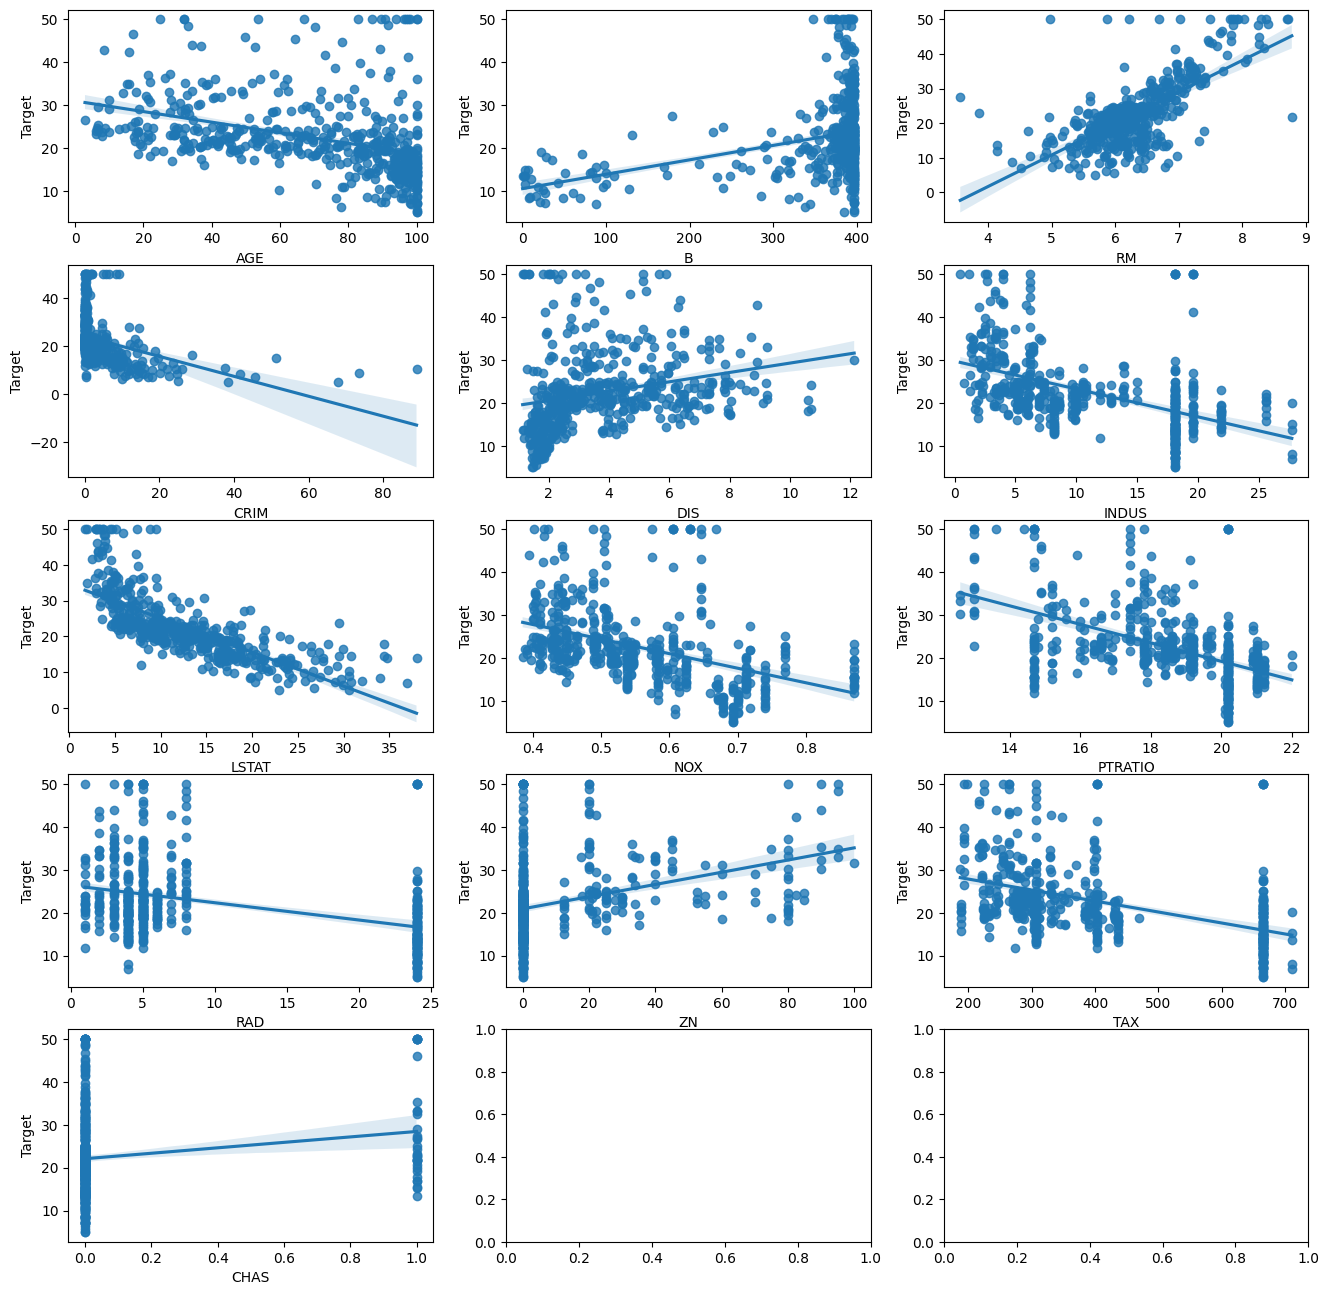

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 5)
x_features = coef.index

for i, feature in enumerate(x_features):
  row = int(i/3)
  col = i%3
  sns.regplot(x = feature, y = 'Target', data = boston_df, ax = axs[row][col])